In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This code reads two CSV files:

"edges.csv" contains the graph's edge data and is stored in the DataFrame df_edges.
"nodes.csv" contains the graph's node data and is stored in the DataFrame df_nodes.

In [4]:
edges_filename = "edges.csv"
nodes_filename = "nodes.csv"

df_edges = pd.read_csv(edges_filename)
df_nodes = pd.read_csv(nodes_filename)

This line creates a graph 'G' using edge data from the 'df_edges' DataFrame. The function 'nx.from_pandas_edgelist' reads each row in the DataFrame as an edge. The columns '# source' and ' target' are used to specify the source and target nodes of each edge.

In [5]:
# Create the graph using the edges CSV
G = nx.from_pandas_edgelist(df_edges, '# source', ' target')  # Adjusted column name

This segment of the code can be broken down as follows:

Node Attributes Addition:

For each row in the df_nodes DataFrame, the code extracts the node identifier (found in the '# index' column) and checks if this node exists in the graph G.
If the node is present in G, the code updates the node's attributes:
' label': This sets the label of the node using the corresponding row's ' label' column.
' viz': The string representation of a dictionary (in the ' viz' column) is converted back into an actual dictionary using eval(). This dictionary contains the visualization data of the node, like its color, size, and position.
Graph Visualization:

The code prepares to visualize the graph:
plt.figure(figsize=(12, 9)): This sets the size of the figure where the graph will be plotted.
colors: A list comprehension creates a list of RGB color codes for each node based on the respective ' viz' attribute of the node.
sizes: A list comprehension generates a list of sizes for each node. The original size from the ' viz' attribute is multiplied by 100 to make it more visible on the plot.
positions: A dictionary comprehension establishes the positions of each node based on the 'x' and 'y' coordinates from the ' viz' attribute.
nx.draw(): This function from NetworkX draws the graph G. The provided arguments set the node positions (pos=positions), enable labels to be shown (with_labels=True), define node colors (node_color=colors), and adjust node sizes (node_size=sizes).
In essence, this segment of code augments the graph G with visualization attributes for each node (color, size, position) and then visualizes the graph based on these attributes.

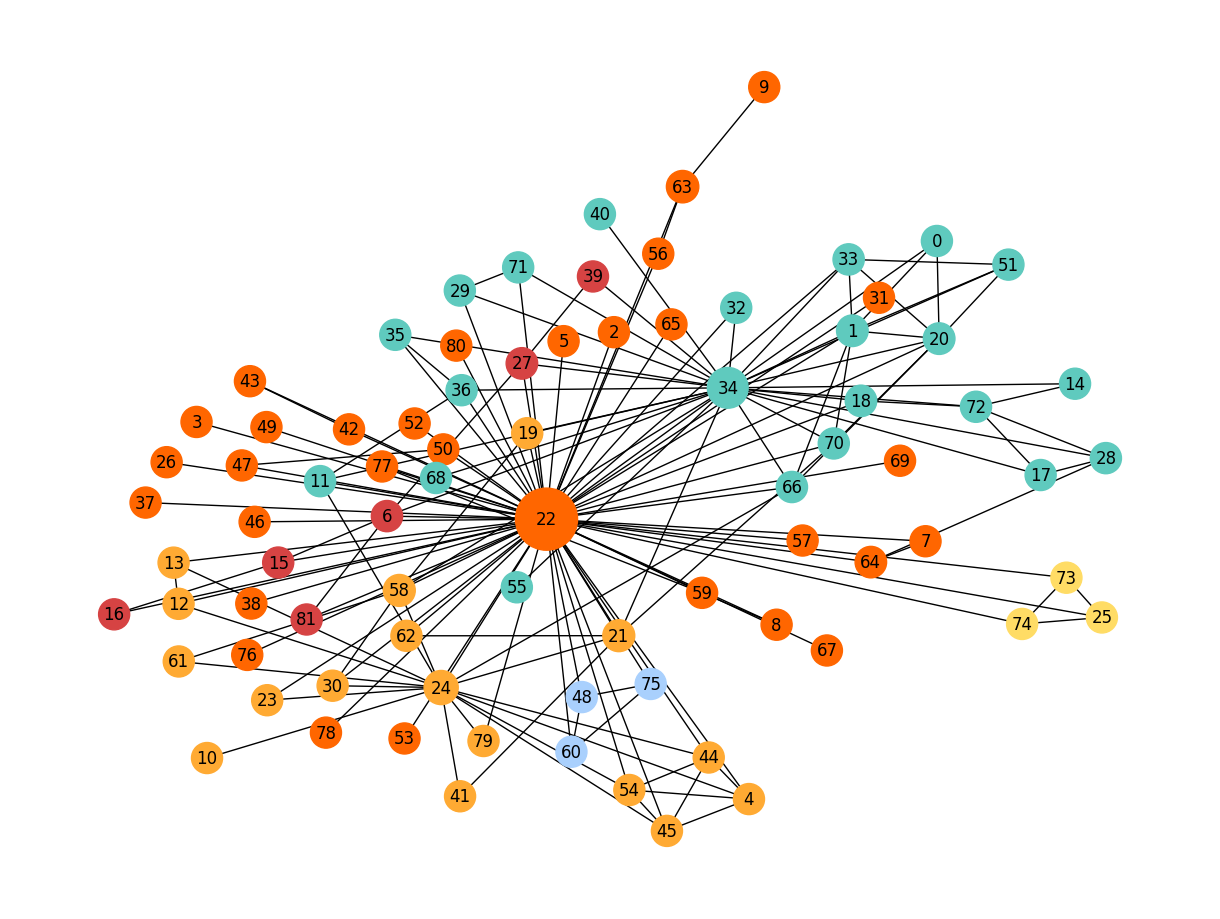

In [6]:
# Enhance the graph with node attributes from the nodes CSV
for index, row in df_nodes.iterrows():
    node = row['# index']
    if node in G:
        G.nodes[node][' label'] = row[' label']
        G.nodes[node][' viz'] = eval(row[' viz'])  # Convert string representation to dictionary without ast

# Visualize the graph
plt.figure(figsize=(12, 9))
colors = [f"#{int(G.nodes[node][' viz']['color']['r']):02x}{int(G.nodes[node][' viz']['color']['g']):02x}{int(G.nodes[node][' viz']['color']['b']):02x}" for node in G.nodes()]
sizes = [G.nodes[node][' viz']['size'] * 100 for node in G.nodes()]  # multiplying by 100 for better visibility
positions = {(node): (G.nodes[node][' viz']['position']['x'], G.nodes[node][' viz']['position']['y']) for node in G.nodes()}
nx.draw(G, pos=positions, with_labels=True, node_color=colors, node_size=sizes)



This code snippet calculates various metrics for the graph `G`:

1. `num_nodes`: Counts the total nodes in the graph.
2. `num_edges`: Counts the total edges in the graph.
3. `avg_degree`: Computes the average number of connections each node has.
4. `density`: Measures how interconnected the graph is, with a higher value indicating more connections relative to the maximum possible.

In [7]:
# Compute and display metrics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)



This code:

1. **Prints**:
   - Node count.
   - Edge count.
   - Average node degree (rounded).
   - Graph density (rounded).

2. **Displays** the graph with its customizations.

In [9]:
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Density: {density:.2f}")

plt.show()

Number of nodes: 82
Number of edges: 162
Average degree: 3.95
Density: 0.05
